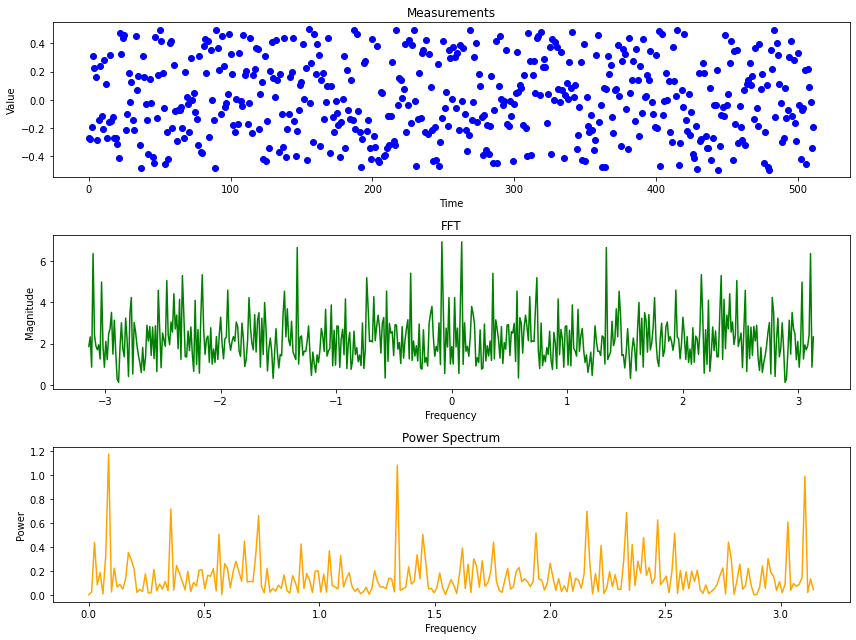

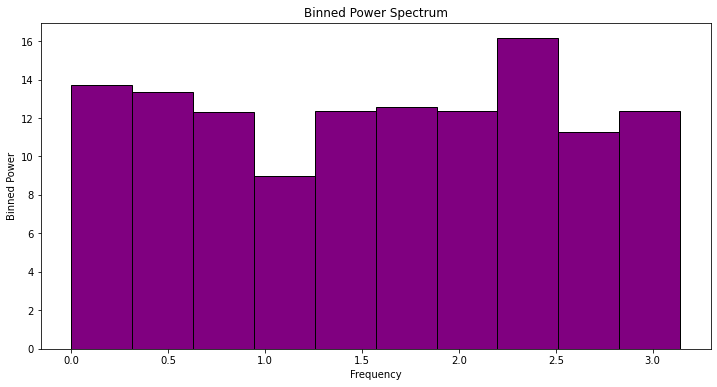

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import cmath

# Load the data from the URL
url = 'http://theory.tifr.res.in/~kulkarni/noise.txt'
data = np.loadtxt(url)

# Number of data points
N = len(data)

# Time interval between measurements (assuming 1 unit time interval)
dt = 1

# Time array for plotting
time = np.arange(N) * dt

# Fourier Transform
freq = np.fft.fftfreq(N, dt)
dft = np.fft.fft(data, norm="ortho")

# Shift the frequencies so that the zero frequency is in the middle
freqs_shifted = np.fft.fftshift(2*np.pi*freq)
dft_shifted = np.fft.fftshift(dft)

# Multiply the DFT points by the prefactor and exp(i * k_q * x_min)
dft_modified = np.array([dt * np.sqrt(N / (2 * np.pi)) * cmath.exp(-1j * k_q * time[0]) * dft_shifted[i] for i, k_q in enumerate(freqs_shifted)])

# Plot the measurements
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(time, data, marker='o', linestyle='', color='b')
plt.title('Measurements')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the FFT
plt.subplot(3, 1, 2)
plt.plot(freqs_shifted, np.abs(dft_modified), color='green', label='FFT')
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Compute the power spectrum using the periodogram
frequencies, power_spectrum = periodogram(data, fs=1)
frequencies *= 2*np.pi

# Plot the power spectrum
plt.subplot(3, 1, 3)
plt.plot(frequencies, power_spectrum, color='orange', label='Power Spectrum')
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

# Number of k bins
num_bins = 10

# Define the edges of the linearly spaced bins
linear_bins = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)

# Compute the binned power spectrum
binned_power_spectrum, _ = np.histogram(frequencies, bins=linear_bins, weights=power_spectrum)

# Normalize the binned power spectrum
bin_widths = np.diff(linear_bins)
binned_power_spectrum /= bin_widths

# Calculate the centers of the bins for plotting
bin_centers = (linear_bins[1:] + linear_bins[:-1]) / 2

# Plot the binned power spectrum as a histogram
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, binned_power_spectrum, width=np.diff(linear_bins), align='center', color='purple', edgecolor='black')
plt.title('Binned Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Binned Power')
plt.show()
